# Final Project: An Automatic Approach to Spike Sorting

                               
                               Hua Tang & Craig Taswell 

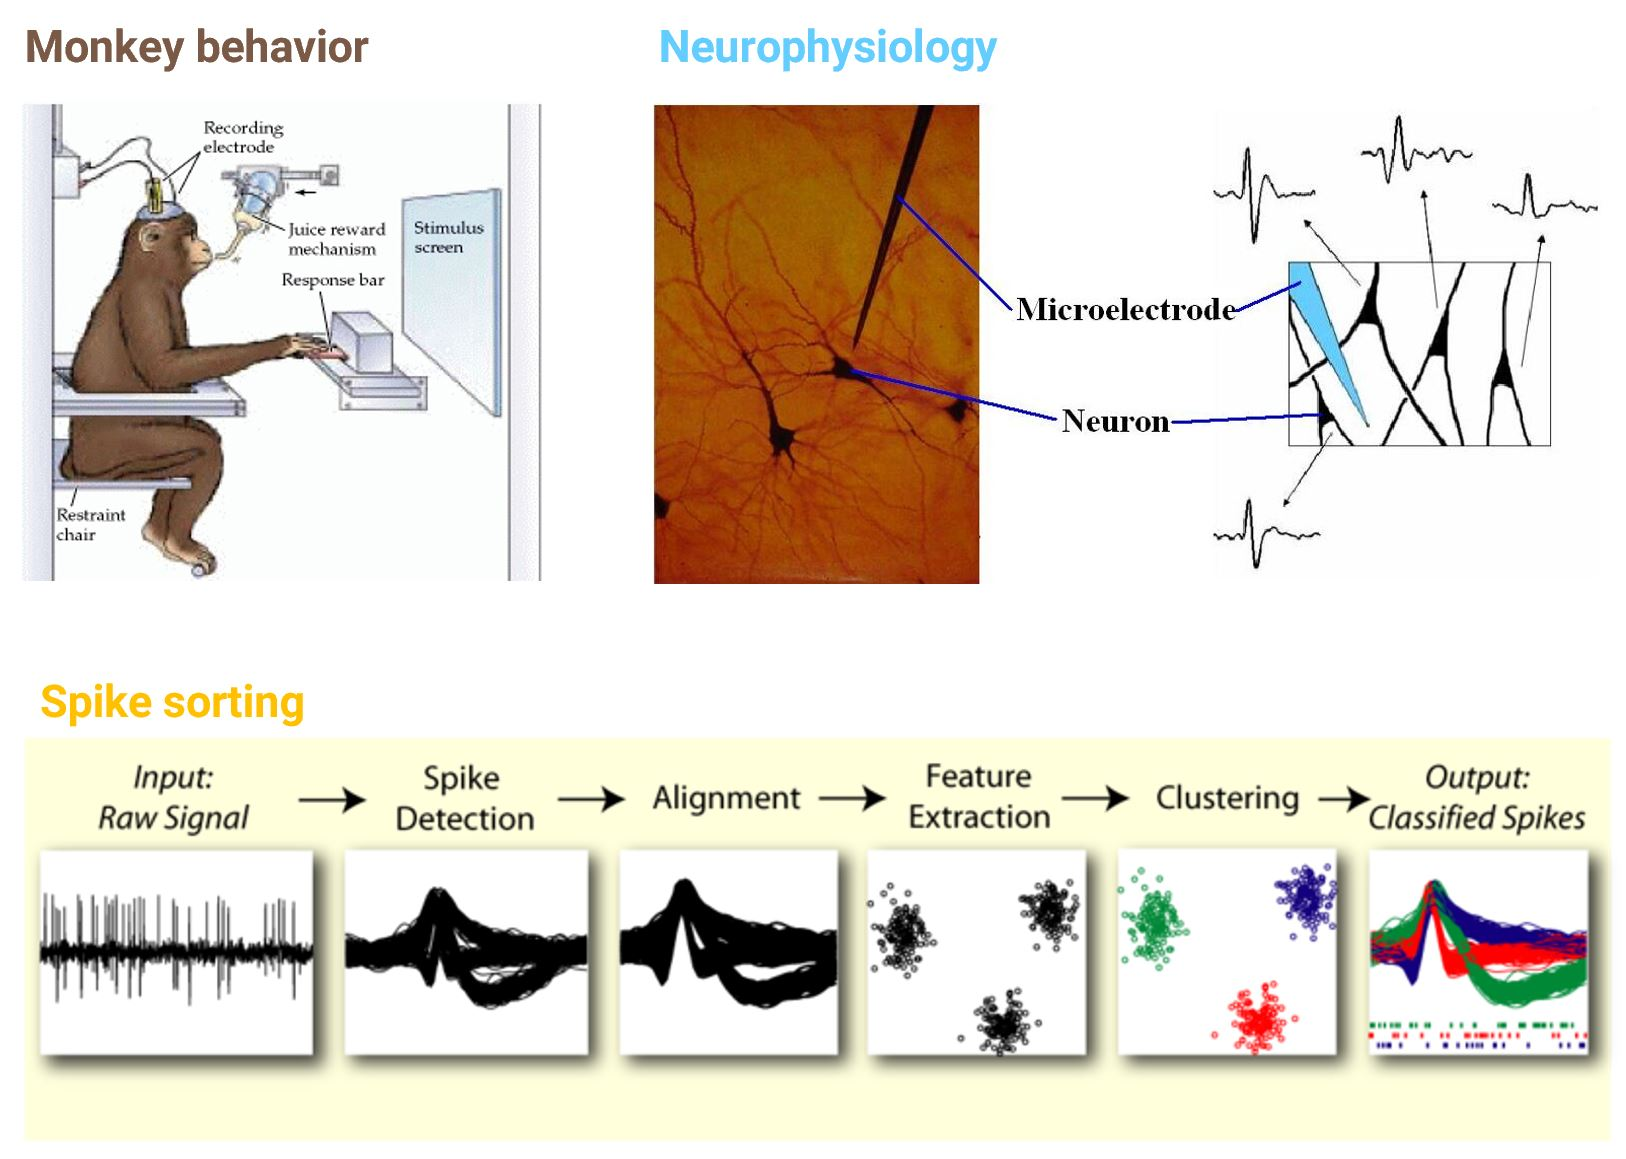

## Import all necessary materials for Data Analysis(packages & data) 

In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np 
import matplotlib.pyplot as plt

#Read in the data to a Pandas DataFame & check the shape of the data, each line presents a waveform
waveform = pd.read_csv("channel_383_waveforms.csv")
waveform.shape

(75784, 52)

## Plot the raw data

Text(0, 0.5, 'voltage (mV)')

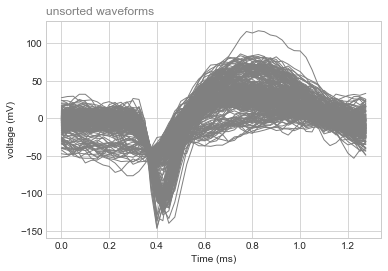

In [2]:
# define the matrix
X = waveform.values;
# define x-axis: ms
x = np.linspace(0/40, 51/40,52) # sample_frequency = 40K Hz (points per sec)
# ranmdom select unsorted wavefor to show
a=len(waveform)
random_list = np.random.randint(0,a,300)


plt.style.use('seaborn-whitegrid')
# multiple line plot
fig = plt.figure()
ax = plt.axes()

for row in random_list:
    plt.plot(x, X[row,:], linewidth=1,color='gray')
    
# Add title & axis labels
plt.title("unsorted waveforms", loc='left', fontsize=12, fontweight=0, color='gray')
plt.legend('')
plt.xlabel("Time (ms)")
plt.ylabel("voltage (mV)")

# PCA Projection to 2D

In [3]:
# necessary materials for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

## Visualize 2D Projection  

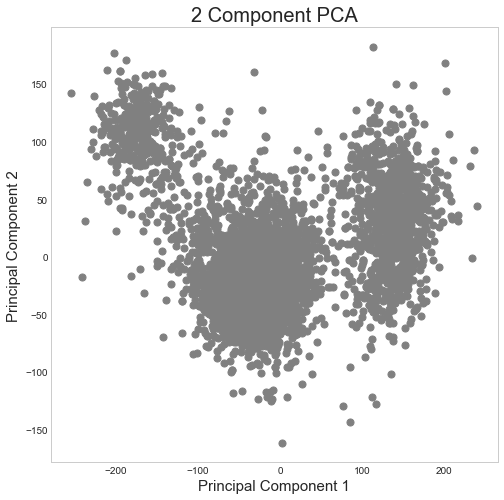

In [4]:
# ranmdom select unsorted wavefor to show
random_list2 = np.random.randint(0,a,5000)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
ax.scatter(principalDf.loc[random_list2, 'principal component 1']
               , principalDf.loc[random_list2, 'principal component 2']
               , c = 'gray'
               , s = 50)
ax.grid()


# Clustering: K-means


## Determine the number of clusters: The Elbow Method

One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified.

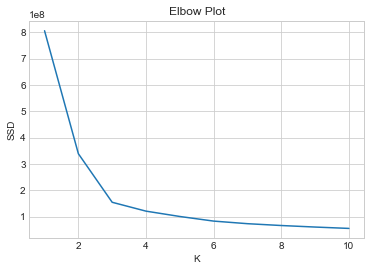

In [6]:
from sklearn.cluster import KMeans
def plot_elbow(dataset, max_clusters):
    """Plot elbow curve for k-means."""
    inertias = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=768797)
        kmeans.fit(dataset)
        inertias.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), inertias)
    plt.title("Elbow Plot")
    plt.xlabel("K")
    plt.ylabel("SSD")

plot_elbow(principalDf, 10)

## At 3 clusters we hit our elbow point!

In [8]:
def plot_kmeans(original_data, cluster_labels, model, k):

    for cluster_idx in range(k):
        plt.scatter(
            original_data.iloc[cluster_labels == cluster_idx, 0],
            original_data.iloc[cluster_labels == cluster_idx, 1],
            label="Cluster #{}".format(cluster_idx),
        )
    plt.legend()
    
    # Add centroids to plot
    plt.scatter(
        model.cluster_centers_[:, 0],
        model.cluster_centers_[:, 1],
        s=100,
        c='red',
    )

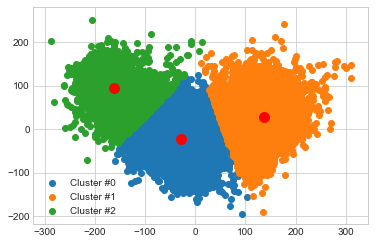

In [9]:
model = KMeans(n_clusters=3)
cluster_labels =model.fit_predict(principalDf)
plot_kmeans(principalDf, cluster_labels, model, 3)

## With these clusters we can now make sense of our raw data!

Text(0, 0.5, 'voltage (mV)')

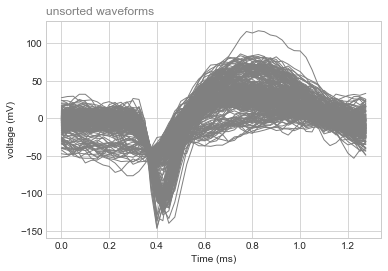

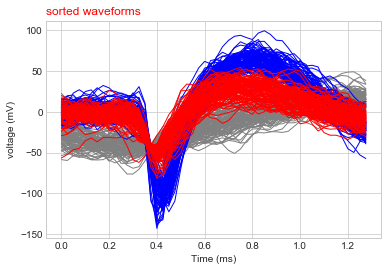

In [11]:
# Plot unsorted Data
plt.style.use('seaborn-whitegrid')

# multiple line plot
fig = plt.figure()
ax = plt.axes()

for row in random_list:
    plt.plot(x, X[row,:], linewidth=1,color='gray')
    
# Add title & axis labels
plt.title("unsorted waveforms", loc='left', fontsize=12, fontweight=0, color='gray')
plt.legend('')
plt.xlabel("Time (ms)")
plt.ylabel("voltage (mV)")

####
colors = ['red', 'blue', 'gray']
# multiple line plot
fig = plt.figure()
ax = plt.axes()
for cluster_idx in range(2,-1,-1):
        b=np.arange(len(cluster_labels))
        ind=b[cluster_labels== cluster_idx]
       # ax = fig.add_subplot(1,3,cluster_idx+1) 
        for row in ind[0:100]:
            plt.plot(x, X[row,:], linewidth=1,c=colors[cluster_idx])
    
# Add title & axis labels
plt.title("sorted waveforms", loc='left', fontsize=12, fontweight=0, color='red')
plt.xlabel("Time (ms)")
plt.ylabel("voltage (mV)")

## If we seperate the clusters we can better illustrate the differences in each group's waveforms 

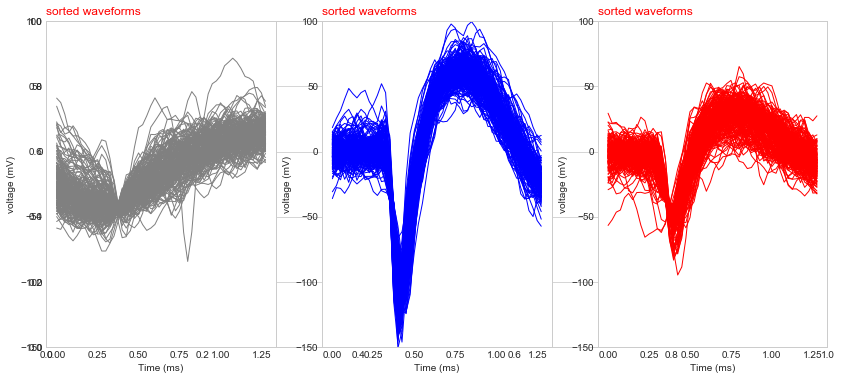

In [12]:
fig = plt.figure(figsize = (14,6))
ax = plt.axes()
for cluster_idx in range(3):
    b=np.arange(len(cluster_labels))
    ind=b[cluster_labels== cluster_idx]
    ax = fig.add_subplot(1,3,3-cluster_idx) 
    ax.grid()
    for row in ind[0:200]:
        plt.plot(x, X[row,:], linewidth=1,c=colors[cluster_idx])
    plt.ylim((-150,100))
    
# Add title & axis labels
    plt.title("sorted waveforms", loc='left', fontsize=12, fontweight=0, color='red')
    plt.xlabel("Time (ms)")
    plt.ylabel("voltage (mV)")